In [1]:
import nibabel as nib
import nilearn.plotting as niplt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
subs=['sub-075', 'sub-131', 'sub-190', 'sub-201', 'sub-235', 'sub-244',
       'sub-249', 'sub-254', 'sub-255', 'sub-256', 'sub-257', 'sub-258',
       'sub-259', 'sub-260', 'sub-261', 'sub-262', 'sub-263', 'sub-264',
       'sub-265', 'sub-266', 'sub-267', 'sub-268', 'sub-269', 'sub-270',
       'sub-271']
results_dir='/jukebox/griffiths/bert-brains/results/21styear/rsa-bert-base-uncased-layer_0/'

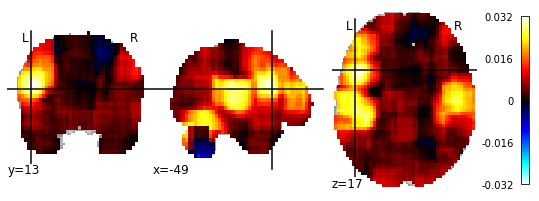

In [9]:
#First Subject
fname='/jukebox/griffiths/bert-brains/results/21styear/rsa-bert-base-uncased-layer_0/sub-075_whole_brain_anatomical_SL.nii.gz'
niplt.plot_stat_map(fname,cut_coords=(-49,13,17))

In [60]:
fnames=[results_dir+sub+"_whole_brain_anatomical_SL.nii.gz" for sub in subs]
mask_nii=nib.load("/jukebox/griffiths/bert-brains/21styear_data/whole_brain_mask.nii.gz")
affine=mask_nii.affine
mask=mask_nii.get_fdata().astype('bool')
volumes=[]
for fname in fnames:
    nii=nib.load(fname)
    data=nii.get_fdata()
    threshold=np.percentile(data[mask],95)
    volumes.append((data>=threshold))
    affine=nii.affine
volumes=np.asarray(volumes)
img=nib.Nifti1Image(np.sum(volumes,axis=0),affine)
nib.save(img,results_dir+"top1_across_sub.nii")

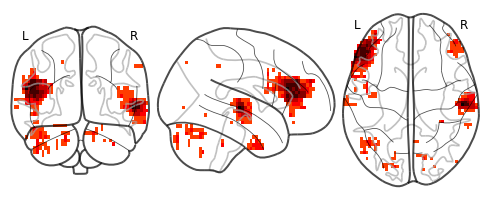

In [61]:
niplt.plot_glass_brain(results_dir+"top1_across_sub.nii",threshold=5)